In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np 
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Load the dotenv file
load_dotenv()

True

In [4]:
# Spotify API credentials
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [5]:
# Read in the data
data = pd.read_csv('../Data/song_data(pop-artist).csv')
df = pd.DataFrame(data)
df

,Unnamed: 0,id,title,all_artists,popularity_artist,popularity_song,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,92,0,2017-09-03,0.615,0.779,2,-6.454,1,0.06650,0.000000,0.1550,0.453,160.000,208198,4
1,1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,74,63,2017-09-08,0.687,0.845,7,-4.370,1,0.10000,0.000000,0.0452,0.809,87.972,190227,4
2,2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,87,78,2016-11-17,0.818,0.803,1,-4.282,1,0.03400,0.000000,0.1530,0.632,106.970,225983,4
3,3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,91,77,2017-03-03,0.624,0.876,9,-3.374,1,0.07350,0.000000,0.3270,0.781,99.943,170827,4
4,4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,91,83,2014-06-21,0.614,0.379,4,-10.480,1,0.60700,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,9918,4UFlPCB4THnQ9TlPHqIQow,Funeral For A Friend / Love Lies Bleeding,Elton John,82,0,1973-10-05,0.410,0.761,9,-8.507,0,0.01980,0.084700,0.2470,0.193,138.712,666572,4
9919,9919,5pSSEkT0963muzzIjsVkrs,Fool's Overture,Supertramp,67,52,1977-01-01,0.406,0.306,3,-10.482,1,0.31300,0.007900,0.0727,0.073,135.272,652560,4
9920,9920,7gC6Rbllqf1yXNC02e5jz2,Heart of the Sunrise - 2003 Remaster,Yes,59,45,1971-11-26,0.362,0.507,1,-11.229,1,0.01740,0.216000,0.1130,0.456,146.641,634440,3
9921,9921,6Ff77WXC58MkhLE5A1qgY1,Venus And Mars / Rock Show / Jet - Live / Rema...,Wings,69,0,1976-12-10,0.331,0.733,2,-8.671,1,0.08870,0.001740,0.9470,0.380,128.512,620747,4


In [6]:
df.shape

(9923, 19)

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'all_artists', 'popularity_artist',
       'popularity_song', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [8]:
# ccount the number of songs with 0 popularity
df.loc[df['popularity_song'] == 0, 'popularity_song'].count()

3323

In [9]:
# Drop the songs with 0 popularity
df.drop(df[df['popularity_song'] == 0].index, inplace=True)

In [10]:
# column data types
pd.DataFrame(df.dtypes, columns=['DataType'])


,DataType
Unnamed: 0,int64
id,object
title,object
all_artists,object
popularity_artist,int64
popularity_song,int64
release_date,object
danceability,float64
energy,float64
key,int64


In [11]:
features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [12]:
df[features].describe()


,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
count,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000
mean,0.571883,0.666534,-7.366078,0.219285,0.083560,0.186554,0.484610,120.547484
std,0.165417,0.219595,4.322217,0.276974,0.228501,0.155939,0.246824,28.266113
min,0.000000,0.000000,-44.907000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469000,0.536000,-8.584250,0.013400,0.000000,0.093600,0.289000,99.928750
50%,0.585000,0.712000,-6.239000,0.083900,0.000014,0.123000,0.481000,119.974000
75%,0.689000,0.838000,-4.744000,0.334250,0.003775,0.229000,0.677000,138.179500
max,0.980000,1.000000,-0.716000,0.995000,0.999000,0.981000,0.981000,214.419000


In [13]:
df.sort_values(by='popularity_song', ascending=False).head()


,Unnamed: 0,id,title,all_artists,popularity_artist,popularity_song,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1016,1016,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,83,88,2013-04-19,0.612,0.807,10,-2.810,1,0.04950,0.017700,0.101,0.398,124.053,240400,4
9156,9156,7lQ8MOhq6IN2w8EYcFNSUk,Without Me,Eminem,89,86,2002-05-26,0.908,0.669,7,-2.827,1,0.00286,0.000000,0.237,0.662,112.238,290320,4
3294,3294,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),Khalid,87,86,2018-04-19,0.351,0.296,4,-10.109,0,0.93400,0.000000,0.095,0.120,115.284,200186,4
2575,2575,3AJwUDP919kvQ9QcozQPxg,Yellow,Coldplay,86,86,2000-07-10,0.429,0.661,11,-7.227,1,0.00239,0.000121,0.234,0.285,173.372,266773,4
136,136,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,Bruno Mars,87,85,2012-12-07,0.726,0.698,5,-4.165,1,0.04900,0.000000,0.309,0.867,143.994,233478,4


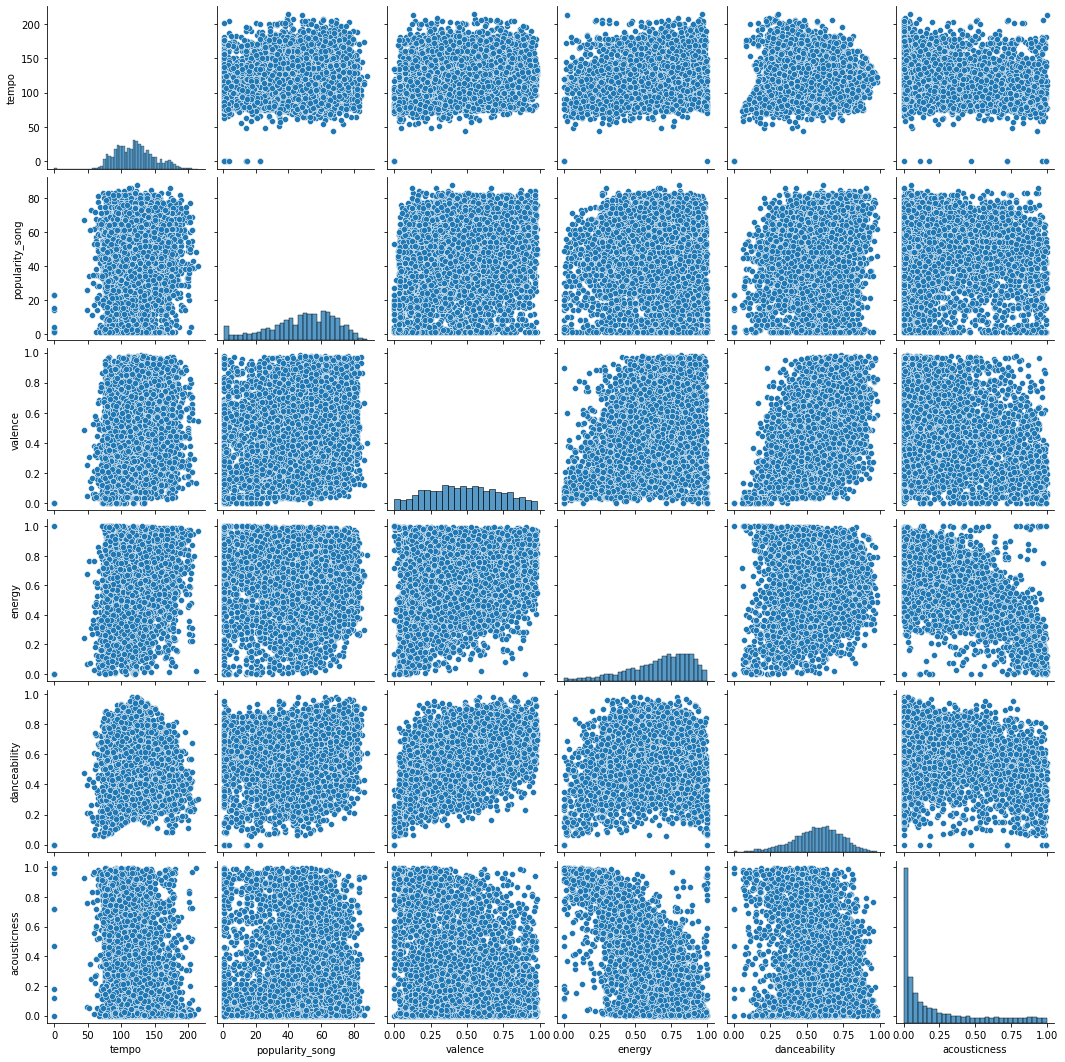

In [14]:
sns.pairplot(df, vars=['tempo', 'popularity_song', 'valence', 'energy', 'danceability', 'acousticness'])

/Users/AndrewArgyrou/opt/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

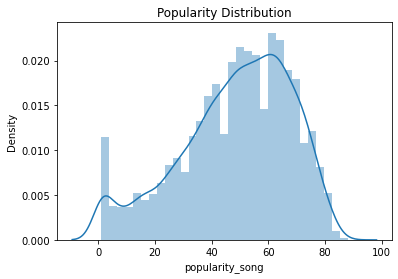

In [15]:
# Popularity distribution plot
sns.distplot(df['popularity_song']).set_title('Popularity Distribution')


<AxesSubplot:xlabel='key', ylabel='popularity_song'>

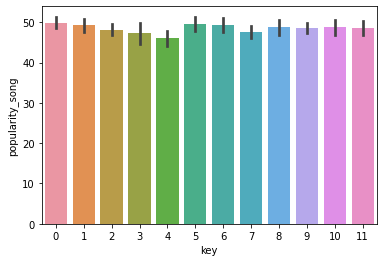

In [16]:
# all keys are encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on.
sns.barplot(x = 'key', y = 'popularity_song', data = df)

<AxesSubplot:xlabel='mode', ylabel='popularity_song'>

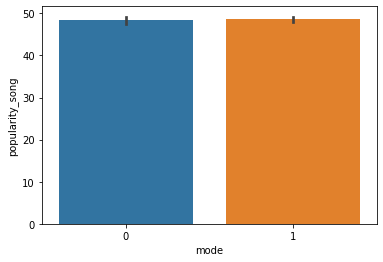

In [17]:
# 0 mode = minor, 1 mode = major
sns.barplot(x = 'mode', y = 'popularity_song', data = df)

<AxesSubplot:xlabel='mode', ylabel='popularity_song'>

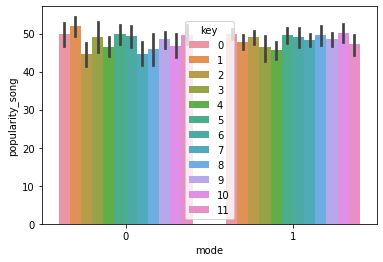

In [18]:
# Combining Key and mode against popularity.
sns.barplot(x = 'mode', y = 'popularity_song', hue = 'key', data = df)


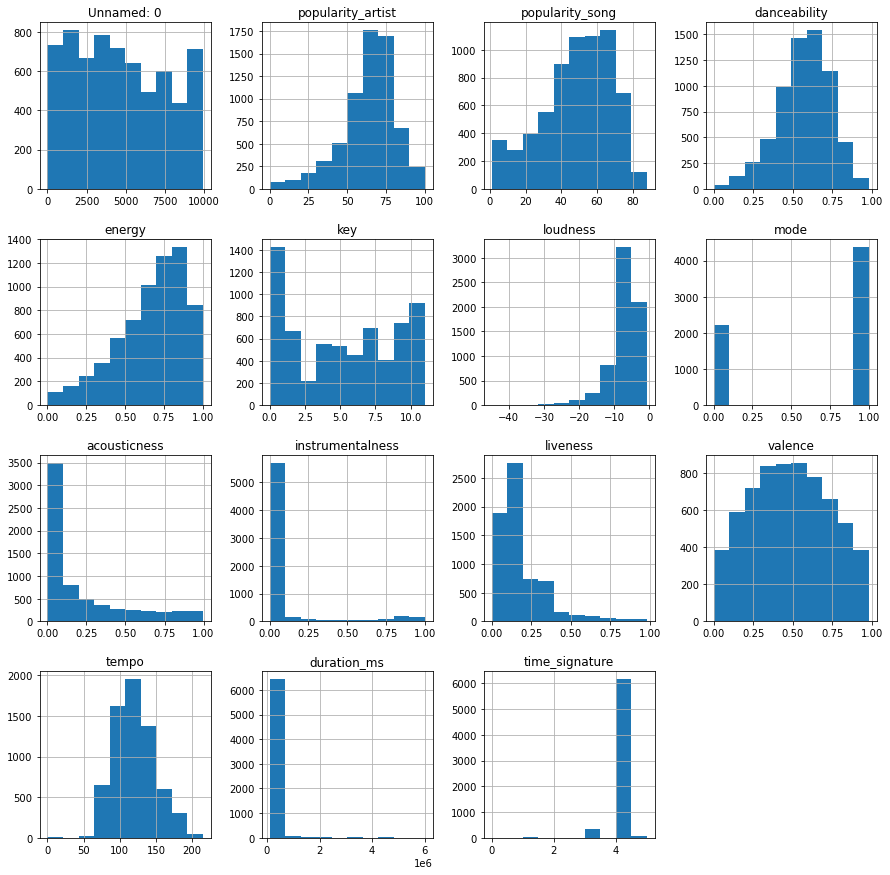

In [19]:
df.hist(figsize=(15, 15))
plt.show()

In [20]:
df.describe()

,Unnamed: 0,popularity_artist,popularity_song,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6600.000000,6.600000e+03,6600.000000
mean,4645.453030,63.080152,48.516364,0.571883,0.666534,5.246818,-7.366078,0.664697,0.219285,0.083560,0.186554,0.484610,120.547484,2.804095e+05,3.942879
std,2875.551524,17.238109,19.613890,0.165417,0.219595,3.573931,4.322217,0.472132,0.276974,0.228501,0.155939,0.246824,28.266113,3.689502e+05,0.348065
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-44.907000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001720e+05,0.000000
25%,2137.750000,55.000000,37.000000,0.469000,0.536000,2.000000,-8.584250,0.000000,0.013400,0.000000,0.093600,0.289000,99.928750,1.975422e+05,4.000000
50%,4419.500000,66.000000,51.000000,0.585000,0.712000,5.000000,-6.239000,1.000000,0.083900,0.000014,0.123000,0.481000,119.974000,2.238800e+05,4.000000
75%,7105.250000,75.000000,64.000000,0.689000,0.838000,9.000000,-4.744000,1.000000,0.334250,0.003775,0.229000,0.677000,138.179500,2.594130e+05,4.000000
max,9920.000000,100.000000,88.000000,0.980000,1.000000,11.000000,-0.716000,1.000000,0.995000,0.999000,0.981000,0.981000,214.419000,6.000295e+06,5.000000


<AxesSubplot:title={'center':'Song Features Correlation'}>

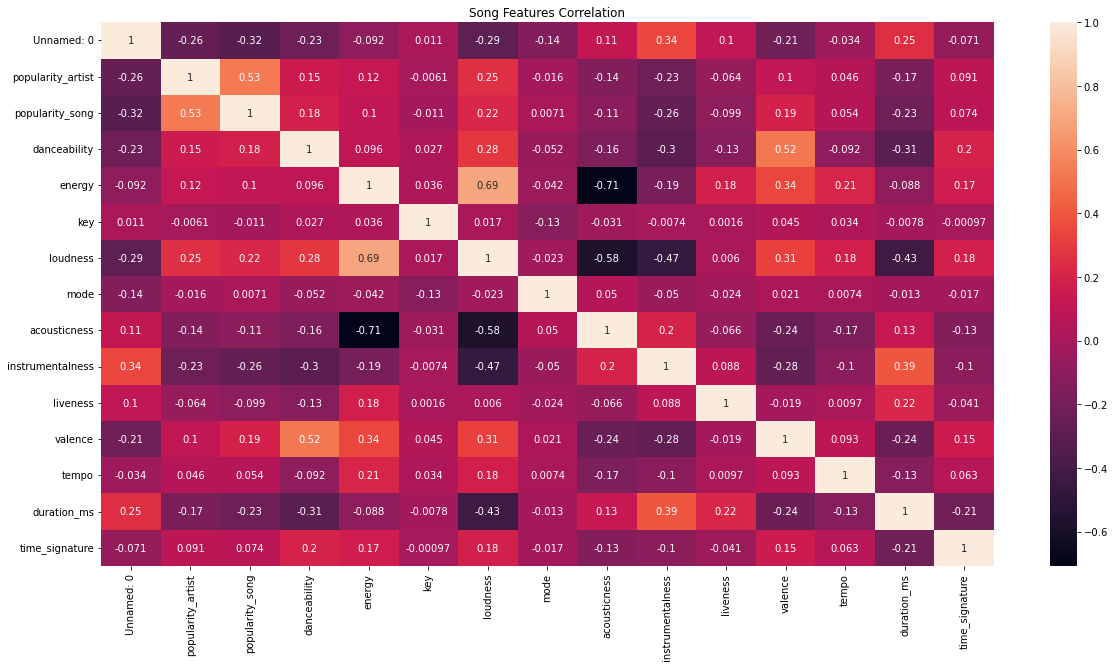

In [21]:
plt.figure(figsize=(20, 10))
plt.title('Song Features Correlation')
sns.heatmap(df.corr(),annot = True)